In [21]:
import numpy as np
import scipy
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix
import time
from numba import jit

import pickle  # for input/output
import generate_data

import matplotlib.pyplot as plt

a).

In [17]:
data = generate_data.load_data("data_square/data_ising_square_largeL.pkl")

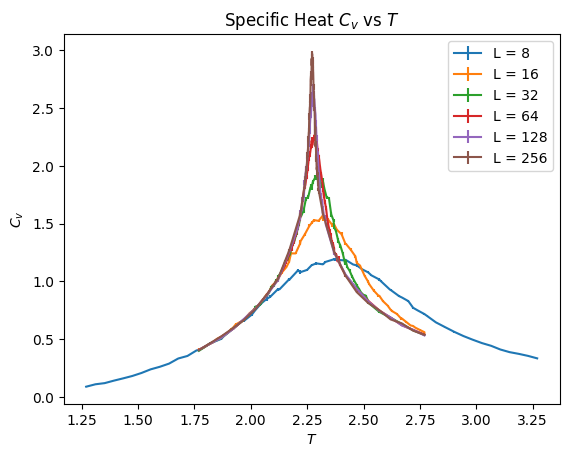

In [35]:
Ls = data['Ls']

for L in Ls:
    plt.errorbar(data[L]['Ts'], data[L]['C'][:,0], data[L]['C'][:,1], label="L = " + str(L))

plt.xlabel('$T$')
plt.ylabel('$C_v$')
plt.title("Specific Heat $C_v$ vs $T$")
plt.legend()
plt.show()

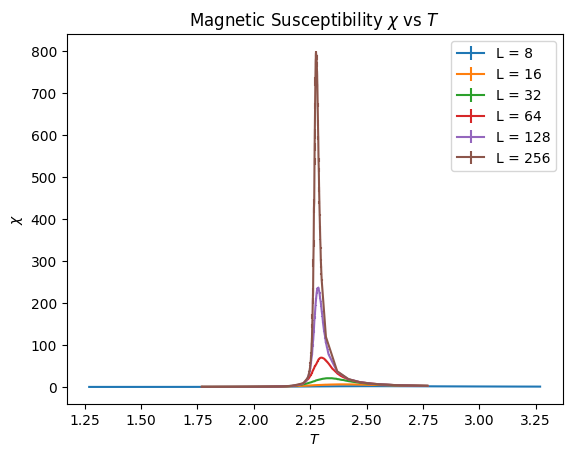

In [39]:
Ls = data['Ls']

for L in Ls:
    plt.errorbar(data[L]['Ts'], data[L]['chi'][:,0], data[L]['chi'][:,1], label="L = " + str(L))

plt.xlabel('$T$')
plt.ylabel('$χ$')
plt.title("Magnetic Susceptibility $χ$ vs $T$")
plt.legend()
plt.show()

b).

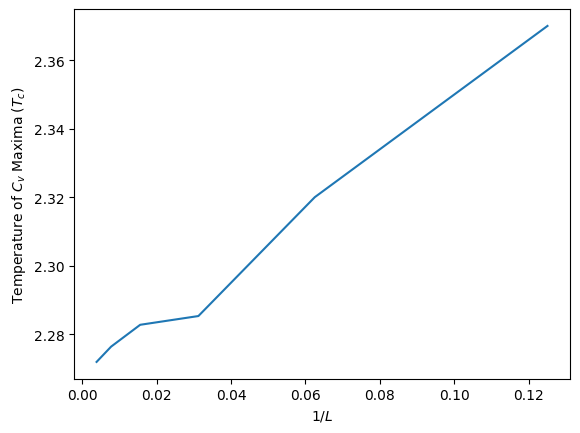

In [57]:
Ls = data['Ls']

cv_maxima = []
L_inverse = []
for L in Ls:
    cv_maxima += [data[L]['Ts'][np.argmax(data[L]['C'][:,0])]]
    L_inverse += [1/L]

plt.plot(L_inverse, cv_maxima)
plt.ylabel("Temperature of $C_v$ Maxima ($T_c$)")
plt.xlabel("$1/L$")
plt.show()

In [58]:
# Extrapolate for L -> inf => 1/L -> 0

a, b = np.polyfit(L_inverse, cv_maxima, 1)
print(f"Y = {a}X + {b}")
y = a*0 + b
print(f"For L = ∞, X = 1/L = 0, we have T_c = Y(0) = {y}.")

Y = 0.8120099212392852X + 2.267753579043558
For L = ∞, X = 1/L = 0, we have T_c = Y(0) = 2.267753579043558.


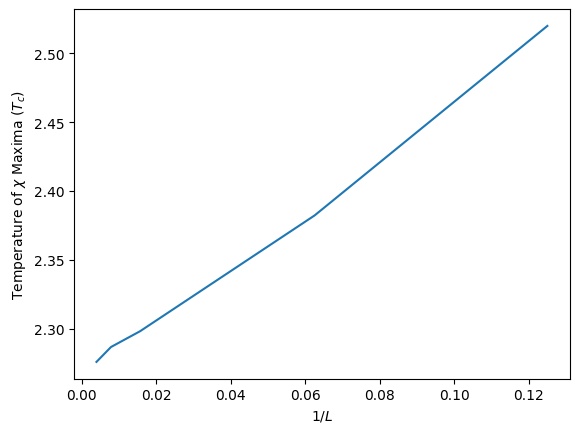

In [59]:
Ls = data['Ls']

chi_maxima = []
L_inverse = []
for L in Ls:
    chi_maxima += [data[L]['Ts'][np.argmax(data[L]['chi'][:,0])]]
    L_inverse += [1/L]

plt.plot(L_inverse, chi_maxima)
plt.ylabel("Temperature of $χ$ Maxima ($T_c$)")
plt.xlabel("$1/L$")
plt.show()

In [60]:
# Extrapolate for L -> inf => 1/L -> 0

a, b = np.polyfit(L_inverse, chi_maxima, 1)
print(f"Y = {a}X + {b}")
y = a*0 + b
print(f"For L = ∞, X = 1/L = 0, we have T_c = Y(0) = {y}.")

Y = 1.9920223953120764X + 2.2664209564422784
For L = ∞, X = 1/L = 0, we have T_c = Y(0) = 2.2664209564422784.


c).

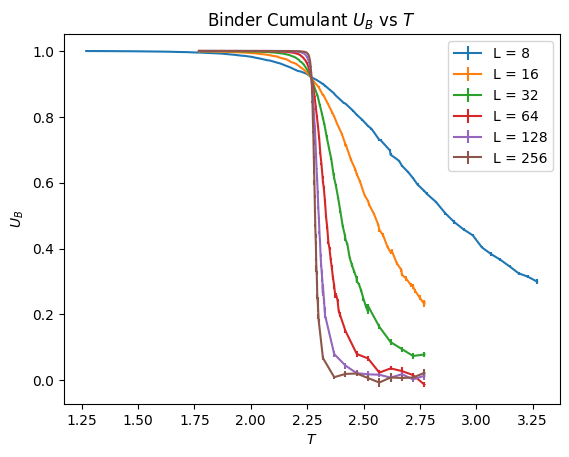

In [78]:
Ls = data['Ls']

for L in Ls:
    plt.errorbar(data[L]['Ts'], data[L]['UB'][:,0], data[L]['UB'][:,1], label="L = " + str(L))

plt.xlabel('$T$')
plt.ylabel('$U_B$')
plt.title("Binder Cumulant $U_B$ vs $T$")
plt.legend()
plt.show()

In [89]:
Ls = data['Ls']

error = np.zeros(shape=data[8]['UB'][:, 0].shape)
for L in Ls:
    try:
        error += abs(data[L]['UB'][:, 0] - data[2*L]['UB'][:, 0])
    except:
        pass

np.argmin(error)

59

In [144]:
T_crossing = []
Ls = data['Ls']

for L in Ls:

    if 2*L not in Ls:
        break
    
    error = []
    t_temp = []
    i = 0
    j = 0
    for t1 in data[L]['Ts']:
        for t2 in data[2*L]['Ts']:
            if abs(t1-t2) <= 0.01:
                if abs(data[L]['UB'][i, 0] - data[2*L]['UB'][j, 0]) < 0.01:
                    error += [abs(data[L]['UB'][i, 0] - data[2*L]['UB'][j, 0])]
                    t_temp += [[t1, t2]]
            
            j += 1
        j = 0
        i += 1

    try:
        T_crossing += [t_temp[np.argmin(error)]]
    except:
        pass

In [145]:
T_crossing

[[2.27, 2.27],
 [1.77, 1.77],
 [2.2648979591836733, 2.267448979591837],
 [1.77, 1.77],
 [1.77, 1.77]]

In [148]:
np.round(np.mean([2.27, 2.2648979591836733, 2.267448979591837]), 3)

2.267

The T = 1.77 point is close to each other but that's not the crossing that we're looking for. The crossing here are the points around 2.27 and the 2.26. Average the points and rounding to 3 decimal places after coma to get 2.267. This temperature is in agreement with the one we found by extrapolation.

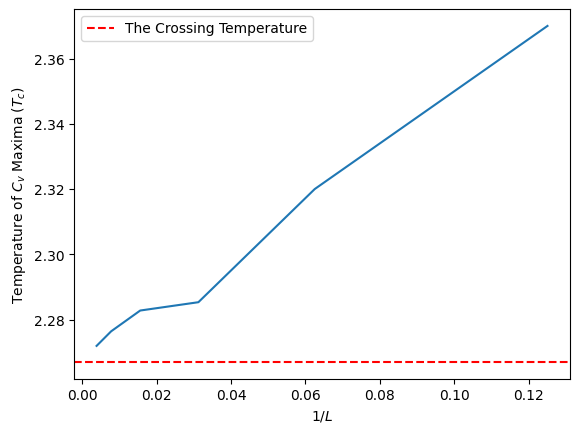

In [152]:
Ls = data['Ls']

cv_maxima = []
L_inverse = []
for L in Ls:
    cv_maxima += [data[L]['Ts'][np.argmax(data[L]['C'][:,0])]]
    L_inverse += [1/L]

plt.plot(L_inverse, cv_maxima)
plt.axhline(2.267, color='r', linestyle='--', label="The Crossing Temperature")
plt.ylabel("Temperature of $C_v$ Maxima ($T_c$)")
plt.xlabel("$1/L$")
plt.legend()
plt.show()

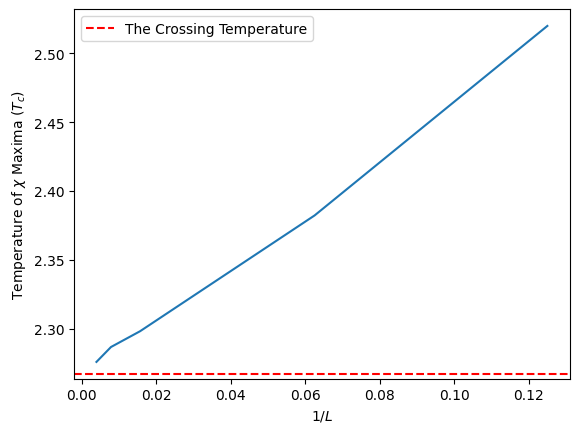

In [153]:
Ls = data['Ls']

chi_maxima = []
L_inverse = []
for L in Ls:
    chi_maxima += [data[L]['Ts'][np.argmax(data[L]['chi'][:,0])]]
    L_inverse += [1/L]

plt.plot(L_inverse, chi_maxima)
plt.axhline(2.267, color='r', linestyle='--', label="The Crossing Temperature")
plt.ylabel("Temperature of $χ$ Maxima ($T_c$)")
plt.xlabel("$1/L$")
plt.legend()
plt.show()

d).

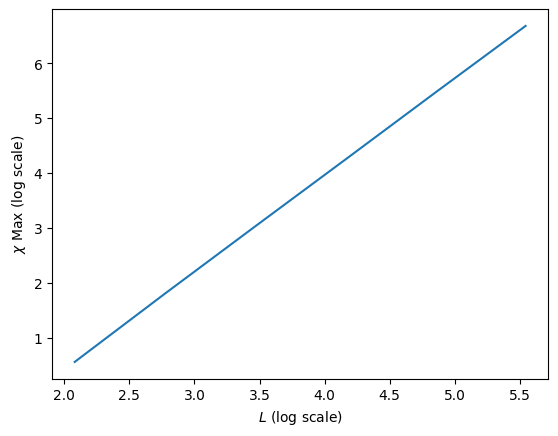

In [172]:
Ls = data['Ls']

chi_max = []
L_inverse = []
for L in Ls:
    chi_max += [np.max(data[L]['chi'][:,0])]
    L_inverse += [1/L]

plt.plot(np.log(Ls), np.log(chi_max))
plt.ylabel("$χ$ Max (log scale)")
plt.xlabel("$L$ (log scale)")
plt.show()

$$
\chi ∼ L^{\frac{\gamma}{\nu}} \\
\log(\chi) = A \log(L) + B\\
\chi = \exp(\log(L^A))*\exp(B) = L^{A} * \exp(B)\\
A = \frac{\gamma}{\nu}
$$

In [173]:
a, b = np.polyfit(np.log(Ls), np.log(chi_max), 1)

chi_ratio = a
print(f"The γ/ν ratio is {chi_ratio}.")

The γ/ν ratio is 1.7627081942228469.


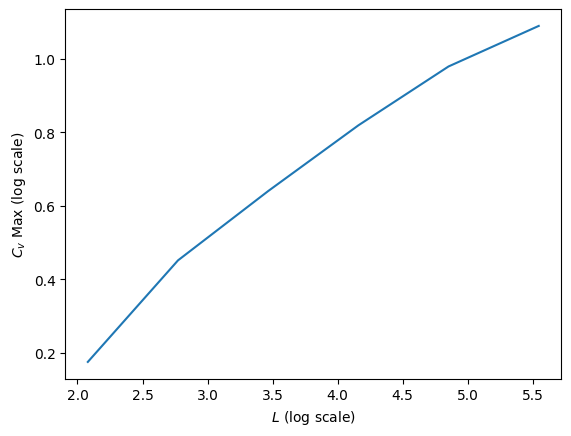

In [167]:
Ls = data['Ls']

cv_max = []
L_inverse = []
for L in Ls:
    cv_max += [np.max(data[L]['C'][:,0])]
    L_inverse += [1/L]

plt.plot(np.log(Ls), np.log(cv_max))
plt.ylabel("$C_v$ Max (log scale)")
plt.xlabel("$L$ (log scale)")
plt.show()

$$
C_v ∼ L^{\frac{\alpha}{\nu}} \\
\log(C_v) = A \log(L) + B\\
C_v = \exp(\log(L^A))*\exp(B) = L^{A} * \exp(B)\\
A = \frac{\alpha}{\nu}
$$

In [171]:
a, b = np.polyfit(np.log(Ls), np.log(cv_max), 1)

cv_ratio = a
print(f"The α/ν ratio is {cv_ratio}.")

The α/ν ratio is 0.26087457372818723.


e).

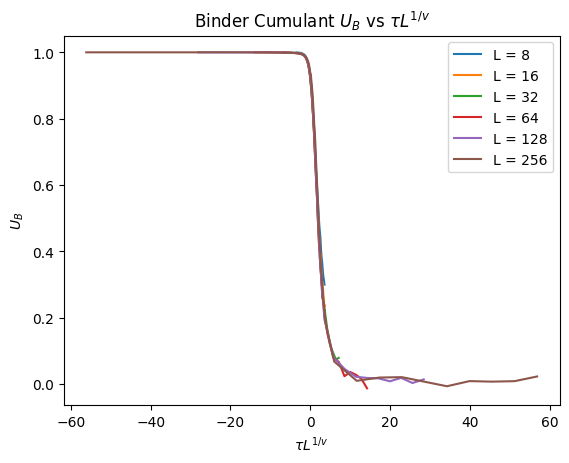

In [199]:
Ls = data['Ls']
Tc = 2.267
v = 1

for L in Ls:
    plt.plot((L**(1/v))*(data[L]['Ts']-Tc)/Tc, data[L]['UB'][:,0], label="L = " + str(L))

plt.xlabel('$τL^{1/v}$')
plt.ylabel('$U_B$')
plt.title("Binder Cumulant $U_B$ vs $τL^{1/v}$")
plt.legend()
plt.show()

In [200]:
print(f"We found v = {v}.")

We found v = 1.


f).

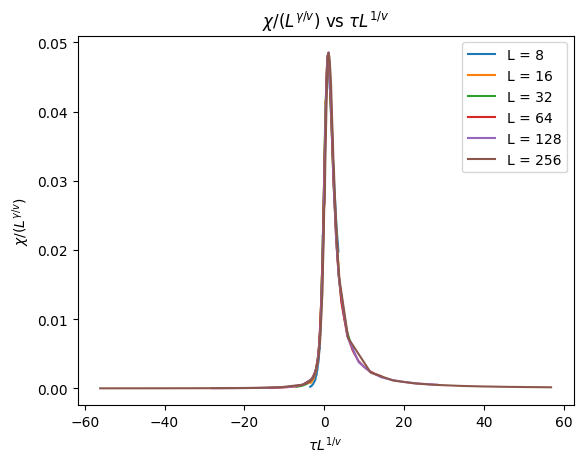

In [225]:
Ls = data['Ls']
Tc = 2.267
v = 1
gamma = 1.75

for L in Ls:
    plt.plot((L**(1/v))*(data[L]['Ts']-Tc)/Tc, data[L]['chi'][:,0]/(L**(gamma/v)), label="L = " + str(L))

plt.xlabel('$τL^{1/v}$')
plt.ylabel('$χ/(L^{γ/v})$')
plt.title("$χ/(L^{γ/v})$ vs $τL^{1/v}$")
plt.legend()
plt.show()

In [223]:
print(f"We found γ = {gamma}.")

We found γ = 1.75.


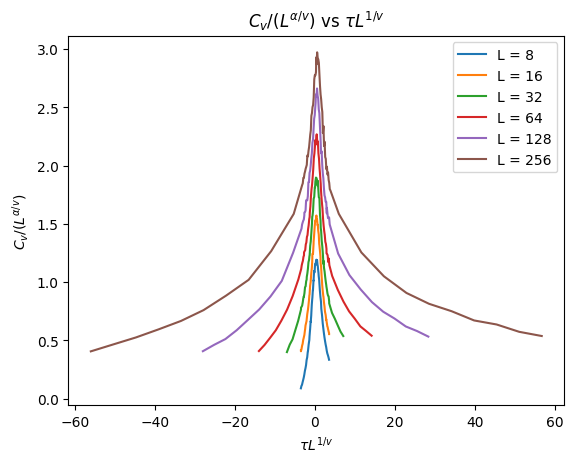

In [241]:
Ls = data['Ls']
Tc = 2.267
v = 1
alpha = 0

for L in Ls:
    plt.plot((L**(1/v))*(data[L]['Ts']-Tc)/Tc, data[L]['C'][:,0]/(L**(alpha/v)), label="L = " + str(L))

plt.xlabel('$τL^{1/v}$')
plt.ylabel('$C_v/(L^{α/v})$')
plt.title("$C_v/(L^{α/v})$ vs $τL^{1/v}$")
plt.legend()
plt.show()

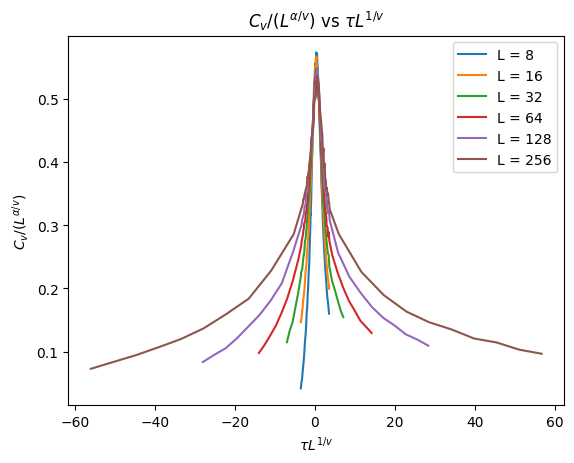

In [242]:
Ls = data['Ls']
Tc = 2.267
v = 1
alpha = 0

for L in Ls:
    plt.plot((L**(1/v))*(data[L]['Ts']-Tc)/Tc, data[L]['C'][:,0]/np.log(L), label="L = " + str(L))

plt.xlabel('$τL^{1/v}$')
plt.ylabel('$C_v/(L^{α/v})$')
plt.title("$C_v/(L^{α/v})$ vs $τL^{1/v}$")
plt.legend()
plt.show()

In [243]:
print(f"We found α = {alpha}.")

We found α = 0.


In [246]:
d = 2

print(f"vd = {v*d}")
print(f"2 - α = {2-alpha}")

print(f"We found that vd = 2 - α.")

vd = 2
2 - α = 2
We found that vd = 2 - α.


g). Find the Tc but using the data from Ising Triangular